# Entrega N - Título

### Grupo M:
     - D. Garat  C.I...
     - G. Moncecchi C.I...



## 1. Objetivo

El objetivo de esta tarea es construir un jugador/clasificador/... utilizando... . 

El éxito del aprendizaje se mide a través de...


## 2. Diseño

En esta sección se deben presentar las decisiones tomadas a la hora de implementar el jugador, clasificador, etc.


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
DATASET_FILE = 'lab4_dataset.csv'
dataset = pd.read_csv(DATASET_FILE, sep=",")
dataset = dataset.drop(columns=['time'])

print("Separando el conjunto de datos en conjunto de entrenamiento y conjunto de prueba...")
# Dividir el conjunto de datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
train_full, test = train_test_split(dataset, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento completo en conjunto de entrenamiento (90%) y validación (10%)
train, validation = train_test_split(train_full, test_size=0.1, random_state=42)

# Separar características (X) y etiquetas (y) para el conjunto de entrenamiento y validación
X_train = train.drop(columns=['cid'])  
y_train = train['cid']

X_val = validation.drop(columns=['cid'])
y_val = validation['cid']


Separando el conjunto de datos en conjunto de entrenamiento y conjunto de prueba...


### Modelo 1

In [3]:
print("Entrenando modelo de regresión logística...")

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=3000)

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de validación
y_pred = model.predict(X_val)

# Calcular la accuracy en el conjunto de validación
accuracy = accuracy_score(y_val, y_pred)

print(f'Accuracy del modelo de regresión logística: {accuracy:.4f}')

Entrenando modelo de regresión logística...
Accuracy del modelo de regresión logística: 0.7733


/home/julio/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Modelo 2

In [6]:
# Definir el modelo con una sola neurona lineal y dos salidas (para 2 clases)
class SimpleNN(nn.Module):
    def __init__(self, features):
        super(SimpleNN, self).__init__()
        self.linear = nn.Linear(features, 2)  #features es el número de características

    def forward(self, x):
        return self.linear(x)

In [7]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Modo de entrenamiento
    train_loss = 0
    correct = 0

    for batch, (X, y) in enumerate(dataloader):
        # Forward pass
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backward pass y optimización
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calcular métricas
        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    # Promedio de pérdida y precisión
    train_loss /= len(dataloader)
    correct /= size
    return train_loss, correct


In [8]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()  # Modo de evaluación
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    # Promedio de pérdida y precisión
    test_loss /= num_batches
    correct /= size
    return test_loss, correct

In [9]:
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convertir a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.int64)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.int64)

dataset_train = TensorDataset(X_train_tensor, y_train_tensor)
dataset_val = TensorDataset(X_val_tensor, y_val_tensor)

batch_size = 32
dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=False)

# Crear la red neuronal
model = SimpleNN(X_train_tensor.shape[1])

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

Epoch [10/100], Loss: 0.6563, Train Accuracy: 0.6205, Val Loss: 0.6711, Val Accuracy: 0.5872
Epoch [20/100], Loss: 0.5836, Train Accuracy: 0.7225, Val Loss: 0.6121, Val Accuracy: 0.6744
Epoch [30/100], Loss: 0.5527, Train Accuracy: 0.7576, Val Loss: 0.5777, Val Accuracy: 0.6919
Epoch [40/100], Loss: 0.5180, Train Accuracy: 0.7726, Val Loss: 0.5561, Val Accuracy: 0.7442
Epoch [50/100], Loss: 0.5008, Train Accuracy: 0.7856, Val Loss: 0.5412, Val Accuracy: 0.7558
Epoch [60/100], Loss: 0.5010, Train Accuracy: 0.7875, Val Loss: 0.5302, Val Accuracy: 0.7558
Epoch [70/100], Loss: 0.4875, Train Accuracy: 0.7901, Val Loss: 0.5221, Val Accuracy: 0.7500
Epoch [80/100], Loss: 0.4789, Train Accuracy: 0.7882, Val Loss: 0.5164, Val Accuracy: 0.7558
Epoch [90/100], Loss: 0.4734, Train Accuracy: 0.7895, Val Loss: 0.5124, Val Accuracy: 0.7558
Epoch [100/100], Loss: 0.4706, Train Accuracy: 0.7895, Val Loss: 0.5084, Val Accuracy: 0.7558


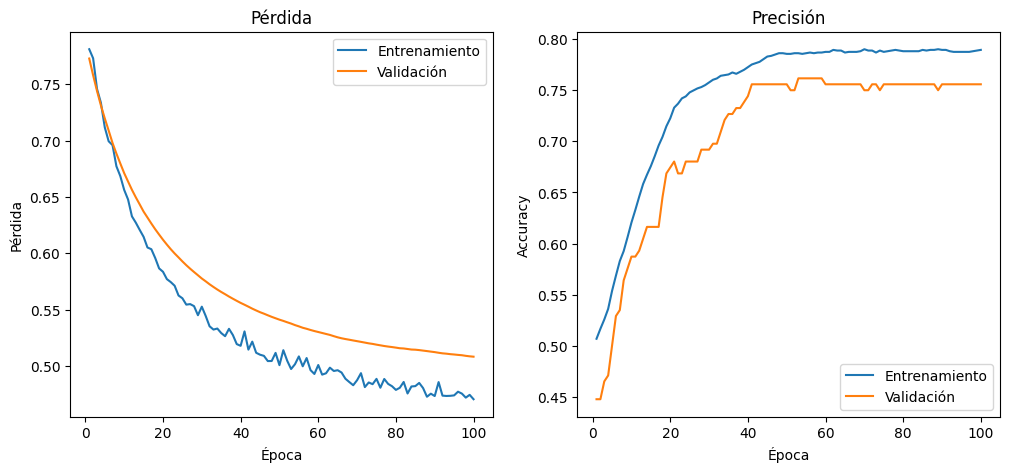

In [10]:
# Entrenamiento
num_epochs = 100
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    # Ejecutar el ciclo de entrenamiento
    train_loss, train_acc = train_loop(dataloader_train, model, criterion, optimizer)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Ejecutar el ciclo de validación
    val_loss, val_acc = test_loop(dataloader_val, model, criterion)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}')

# Graficar las pérdidas y accuracies
plt.figure(figsize=(12, 5))

# Gráfico de la pérdida
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Entrenamiento')
plt.plot(range(1, num_epochs+1), val_losses, label='Validación')
plt.title('Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de la accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Entrenamiento')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Validación')
plt.title('Precisión')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Modelo 3

In [11]:
class SimpleSigmoidNN(nn.Module):
    def __init__(self, features):
        super(SimpleSigmoidNN, self).__init__()
        self.linear = nn.Linear(features, 1)  # Una neurona, una salida
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Activación sigmoide

In [12]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Modo de entrenamiento
    train_loss = 0
    correct = 0

    for batch, (X, y) in enumerate(dataloader):
        # Forward pass
        pred = model(X).squeeze()  # Aplanar la salida para que sea un vector
        loss = loss_fn(pred, y)

        # Backward pass y optimización
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calcular métricas
        train_loss += loss.item()

        # Si pred contiene probabilidades, usamos 0.5 como umbral para clase binaria
        pred_class = (pred > 0.5).type(torch.float)  # Clase 1 si probabilidad > 0.5
        correct += (pred_class == y).type(torch.float).sum().item()

    # Promedio de pérdida y precisión
    train_loss /= len(dataloader)
    correct /= size
    return train_loss, correct

In [13]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()  # Modo de evaluación
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X).squeeze()  # Aplanar la salida para que sea un vector
            test_loss += loss_fn(pred, y).item()

            # Umbral de 0.5 para clasificación binaria
            pred_class = (pred > 0.5).type(torch.float)
            correct += (pred_class == y).type(torch.float).sum().item()

    # Promedio de pérdida y precisión
    test_loss /= num_batches
    correct /= size
    return test_loss, correct

In [14]:
# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convertir a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)


dataset_train = TensorDataset(X_train_tensor, y_train_tensor)
dataset_val = TensorDataset(X_val_tensor, y_val_tensor)

batch_size = 32
dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=False)

# Crear la red neuronal
model = SimpleSigmoidNN(X_train_tensor.shape[1])

# Definir la función de pérdida (entropía cruzada binaria) y el optimizador (SGD)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

Epoch [10/100], Loss: 0.6284, Train Accuracy: 0.6836, Val Loss: 0.6281, Val Accuracy: 0.6453
Epoch [20/100], Loss: 0.5861, Train Accuracy: 0.7284, Val Loss: 0.5985, Val Accuracy: 0.7035
Epoch [30/100], Loss: 0.5614, Train Accuracy: 0.7511, Val Loss: 0.5787, Val Accuracy: 0.7500
Epoch [40/100], Loss: 0.5433, Train Accuracy: 0.7654, Val Loss: 0.5639, Val Accuracy: 0.7384
Epoch [50/100], Loss: 0.5333, Train Accuracy: 0.7687, Val Loss: 0.5528, Val Accuracy: 0.7733
Epoch [60/100], Loss: 0.5209, Train Accuracy: 0.7771, Val Loss: 0.5432, Val Accuracy: 0.7791
Epoch [70/100], Loss: 0.5160, Train Accuracy: 0.7804, Val Loss: 0.5355, Val Accuracy: 0.7674
Epoch [80/100], Loss: 0.5036, Train Accuracy: 0.7862, Val Loss: 0.5292, Val Accuracy: 0.7674
Epoch [90/100], Loss: 0.5036, Train Accuracy: 0.7895, Val Loss: 0.5239, Val Accuracy: 0.7733
Epoch [100/100], Loss: 0.4949, Train Accuracy: 0.7895, Val Loss: 0.5191, Val Accuracy: 0.7733


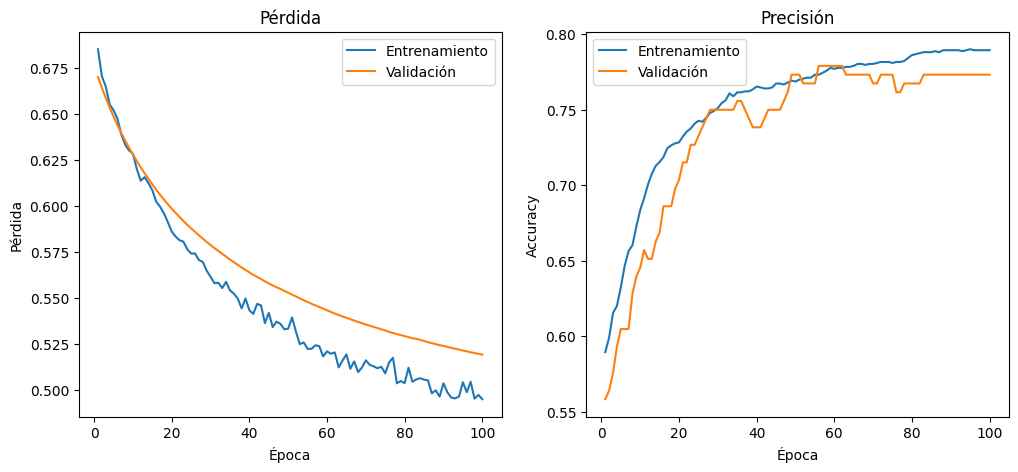

In [15]:
# Entrenamiento
num_epochs = 100
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    # Ejecutar el ciclo de entrenamiento
    train_loss, train_acc = train_loop(dataloader_train, model, criterion, optimizer)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Ejecutar el ciclo de validación
    val_loss, val_acc = test_loop(dataloader_val, model, criterion)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}')

# Graficar las pérdidas y accuracies
plt.figure(figsize=(12, 5))

# Gráfico de la pérdida
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Entrenamiento')
plt.plot(range(1, num_epochs+1), val_losses, label='Validación')
plt.title('Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de la accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Entrenamiento')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Validación')
plt.title('Precisión')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Modelo 4

In [16]:
class SigmoidNNWithHiddenLayer(nn.Module):
    def __init__(self, features):
        super(SigmoidNNWithHiddenLayer, self).__init__()
        self.hidden = nn.Linear(features, 16)   # Capa oculta con 16 unidades
        self.output = nn.Linear(16, 2)          # Capa de salida con 2 neuronas (para las dos clases)
    
    def forward(self, x):
        x = torch.sigmoid(self.hidden(x))
        x = torch.softmax(self.output(x), dim=1) # Softmax para obtener probabilidades
        return x

In [17]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Modo de entrenamiento
    train_loss = 0
    correct = 0

    for batch, (X, y) in enumerate(dataloader):
        # Forward pass
        pred = model(X)  # La salida ya tiene forma (batch_size, 2)
        loss = loss_fn(pred, y)

        # Backward pass y optimización
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calcular métricas
        train_loss += loss.item()

        # Obtener la clase predicha (índice de la mayor probabilidad)
        pred_class = pred.argmax(dim=1)  # Clase con la mayor probabilidad
        correct += (pred_class == y).type(torch.float).sum().item()

    # Promedio de pérdida y precisión
    train_loss /= len(dataloader)
    correct /= size
    return train_loss, correct

In [18]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()  # Modo de evaluación
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)  # La salida ya tiene forma (batch_size, 2)
            test_loss += loss_fn(pred, y).item()

            # Obtener la clase predicha (índice de la mayor probabilidad)
            pred_class = pred.argmax(dim=1)  # Clase con la mayor probabilidad
            correct += (pred_class == y).type(torch.float).sum().item()

    # Promedio de pérdida y precisión
    test_loss /= num_batches
    correct /= size
    return test_loss, correct

In [24]:
# Convertir a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

dataset_train = TensorDataset(X_train_tensor, y_train_tensor)
dataset_val = TensorDataset(X_val_tensor, y_val_tensor)

batch_size = 32
dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=False)
# Crear la red neuronal
model = SigmoidNNWithHiddenLayer(X_train_tensor.shape[1])

# Definir la función de pérdida (entropía cruzada binaria) y el optimizador (SGD)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)

SyntaxError: invalid syntax (480023934.py, line 6)

In [25]:
# Entrenamiento
num_epochs = 100
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    # Ejecutar el ciclo de entrenamiento
    train_loss, train_acc = train_loop(dataloader_train, model, criterion, optimizer)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Ejecutar el ciclo de validación
    val_loss, val_acc = test_loop(dataloader_val, model, criterion)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}')

# Graficar las pérdidas y accuracies
plt.figure(figsize=(12, 5))

# Gráfico de la pérdida
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Entrenamiento')
plt.plot(range(1, num_epochs+1), val_losses, label='Validación')
plt.title('Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de la accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Entrenamiento')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Validación')
plt.title('Precisión')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

RuntimeError: expected scalar type Long but found Float

## 3. Experimentación

- Presentar los distintos experimentos que se realizan y los resultados que se obtienen.

- La información de los resultados se presenta en tablas y en gráficos, de acuerdo a su naturaleza. Por ejemplo:

_En la gráfica 1, se observa el error cuadrático total del conjunto de entrenamiento a medida que pasan los juegos para el oponente X_

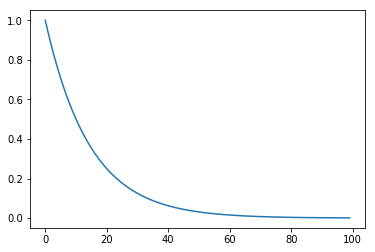

In [2]:
import matplotlib.pyplot
matplotlib.pyplot.plot(range(0,100), [2**-(x/10) for x in range(0,100)])


- Debe existir alguna instancia donde se compile la información relevante de los experimentos de forma de poder comparar fácilmente los distintos experimentos. Por ejemplo:

_En la tabla 1, se presentan los distintos resultados contra el jugador aleatorio, para los distintos valores de $\alpha$ elegidos. El mejor resultado se obtiene para $\alpha=0.05$, lo que prueba que la estrategia..._

<table>
  <tr>
    <th>$\alpha$</th>
    <th>...</th>
    <th>Turnos</th>
    <th>Error</th>
  </tr>
  <tr>
    <td>0.001</td>
    <td>...</td>
    <td>100</td>
    <td>0.991</td>
  </tr>    
  <tr>
    <td>0.005</td>
    <td>...</td>
    <td>100</td>
    <td>0.987</td>
  </tr>
  <tr style="font-weight:bold">
    <td>0.05</td>
    <td>...</td>
    <td>100</td>
    <td>0.329</td>
  </tr>
  <tr>
    <td>0.5</td>
    <td>...</td>
    <td>100</td>
    <td>0.564</td>
  </tr>    
    <caption>Tabla 1 - Entrenamiento del jugador X para distintos valores de $\alpha$</caption>
</table>


## 4. Conclusión

Una breve conclusión del trabajo realizado. Por ejemplo: 
- ¿cuándo se dieron los mejores resultados del jugador?
- ¿encuentra alguna relación con los parámetros / oponentes/ atributos elegidos?
- ¿cómo mejoraría los resultados?